## Predicting House Price

In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sb
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from scipy import stats
from scipy.stats import skew, norm

In [2]:
#Read dataset
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [3]:
#Review dataset
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
#Review dataset size and shapes
df_train.shape, df_test.shape

((1460, 81), (1459, 80))

### Data Back Up

In [6]:
#take a back up copy of dataset
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

### Target Setup

In [7]:
#Target column is identified as House SalePrice
y_train = df_train['SalePrice']

In [8]:
#Drop column id as that do not contribute to calculate SalePrice
srs_testid = df_test['Id'] #Take backup of testid for final submission file

df_train.drop('Id', inplace=True, axis=1)
df_test.drop('Id', inplace=True, axis=1)

#Validate column reduction
df_train.shape, df_test.shape

((1460, 80), (1459, 79))

### Building All Data

In [9]:
#Concate both train and test dataset for data transformation

df_alldata = pd.concat([df_train, df_test], axis=0).reset_index(drop=True)

#Review all data
df_alldata.shape

(2919, 80)

In [10]:
#drop target column SalePrice from all data
df_alldata.drop('SalePrice', 
               inplace=True,
               axis=1)

In [11]:
df_alldata.head(3)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008


## Data Munging

In [12]:
#Find null values in dataset
alldata_na = df_alldata.isnull().sum()
alldata_na = alldata_na[alldata_na>0]
alldata_na = alldata_na.sort_values(ascending=False)
print('Number of cols with na: ', alldata_na)

Number of cols with na:  PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageCond       159
GarageFinish     159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Electrical         1
BsmtUnfSF          1
Exterior1st        1
Exterior2nd        1
TotalBsmtSF        1
GarageArea         1
GarageCars         1
BsmtFinSF2         1
BsmtFinSF1         1
KitchenQual        1
SaleType           1
dtype: int64


## Handling Missing Values

In [13]:
#For selected columns below impute missing values with 'None'
nonecols=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType','MSSubClass']

for col in nonecols:
    df_alldata[col] = df_alldata[col].fillna('None')

In [14]:
#For selected columns below impute missing values with 0
zerocols = ['GarageYrBlt','GarageArea','GarageCars', 'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','MasVnrArea']

for col in zerocols:
    df_alldata[col] = df_alldata[col].fillna(0)

In [15]:
#For selected columns below fill null with mode
modecols=['MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType']

for col in modecols:
    df_alldata[col] = df_alldata[col].fillna(df_alldata[col].mode()[0])

In [16]:
#Drop the Utilities column
df_alldata.drop('Utilities', inplace=True, axis=1)

In [17]:
#Impute value 'Typ'
df_alldata['Functional'] = df_alldata.fillna('Typ')

In [18]:
#Impute lotfrontage null values with Neighbour hood median
df_alldata['LotFrontage'] = df_alldata.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [19]:
#Lookout for missing null values again
nas = df_alldata.isnull().sum()
nas = nas[nas>0]
nas

Series([], dtype: int64)

In [20]:
#Add new column TotalSF
df_alldata['TotalSF'] = df_alldata['TotalBsmtSF'] + df_alldata['1stFlrSF'] + df_alldata['2ndFlrSF']

In [21]:
# Transform some numeric col to categorical as they were
numtocatg = ['MSSubClass','OverallCond','YrSold','MoSold']

for col in numtocatg:
    df_alldata[col] = df_alldata[col].astype(str)

---

In [22]:
#Selecting numerical features
num_feats = df_alldata.select_dtypes(exclude='object').columns
num_feats

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'OpenPorchSF',
       'OverallQual', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF',
       'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'TotalSF'],
      dtype='object')

In [23]:
#another method
num_feats = df_alldata.dtypes[df_alldata.dtypes != 'object'].index
num_feats

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'OpenPorchSF',
       'OverallQual', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF',
       'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'TotalSF'],
      dtype='object')

In [24]:
#Before onehot encoding
df_beforeonehot = df_alldata.copy()

In [25]:
#Get categorical features
catg_feats = [ col for col in df_alldata.columns if col not in num_feats]
catg_feats[:10]

['Alley',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2']

In [26]:
df_alldata.shape

(2919, 79)

In [27]:
df_alldata_copy = df_alldata.copy()

## Perform One hot Encoding

In [28]:
#Actual onehot encoding avoiding dummy variable trap
df_temp1 = df_alldata.copy()
for col in catg_feats:
    df_temp = df_alldata[col]
    df_temp = pd.DataFrame(df_temp)
    df_temp = pd.get_dummies(df_temp, prefix = col)
    temp = df_temp.columns[0] #Delete one dummy variable
    df_temp.drop(temp, inplace=True, axis=1)
    df_temp1 = pd.concat([df_temp1, df_temp], axis=1).reset_index(drop=True)
    df_temp1.drop(col, inplace=True, axis=1) #Delete actual column from dataframe

In [29]:
df_temp1.shape

(2919, 1369)

In [30]:
df_temp1.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,1,1,0,1,0,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,1,1,1,0,0,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,1,1,0,1,0,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,1,1,0,0,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,1,1,0,1,0,0


## Building Training and Test Set

In [31]:
df_train = df_temp1[:df_train_copy.shape[0]]
df_test = df_temp1[df_train_copy.shape[0]:]

In [32]:
df_train.shape

(1460, 1369)

In [33]:
y_train.shape

(1460,)

---

## Stacking Models

In [65]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')
print('Data Manipulation, Mathematical Computation and Visualisation packages imported!')

# Statistical packages used for transformations
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats.stats import pearsonr
print('Statistical packages imported!')

# Metrics used for measuring the accuracy and performance of the models
#from sklearn import metrics
from sklearn.metrics import mean_squared_error
print('Metrics packages imported!')

# Algorithms used for modeling
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
print('Algorithm packages imported!')

# Pipeline and scaling preprocessing will be used for models that are sensitive
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
print('Pipeline and preprocessing packages imported!')

# Model selection packages used for sampling dataset and optimising parameters
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
print('Model selection packages imported!')

# Set visualisation colours
mycols = ["#66c2ff", "#5cd6d6", "#00cc99", "#85e085", "#ffd966", "#ffb366", "#ffb3b3", "#dab3ff", "#c2c2d6"]
sns.set_palette(palette = mycols, n_colors = 4)
print('My colours are ready! :)')

# To ignore annoying warning
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
warnings.filterwarnings("ignore", category=DeprecationWarning)
print('Deprecation warning will be ignored!')

Data Manipulation, Mathematical Computation and Visualisation packages imported!
Statistical packages imported!
Metrics packages imported!
Algorithm packages imported!
Pipeline and preprocessing packages imported!
Model selection packages imported!
My colours are ready! :)
Deprecation warning will be ignored!


In [37]:
#Creating initial model
model = xgb.XGBRegressor(objective='reg:squarederror')

In [38]:
#Train the model
model.fit(df_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [50]:
#Retrieve indexes of all the features which are important
imp_feat = np.argsort(model.feature_importances_)[::-1]
imp_feat = imp_feat[:30]

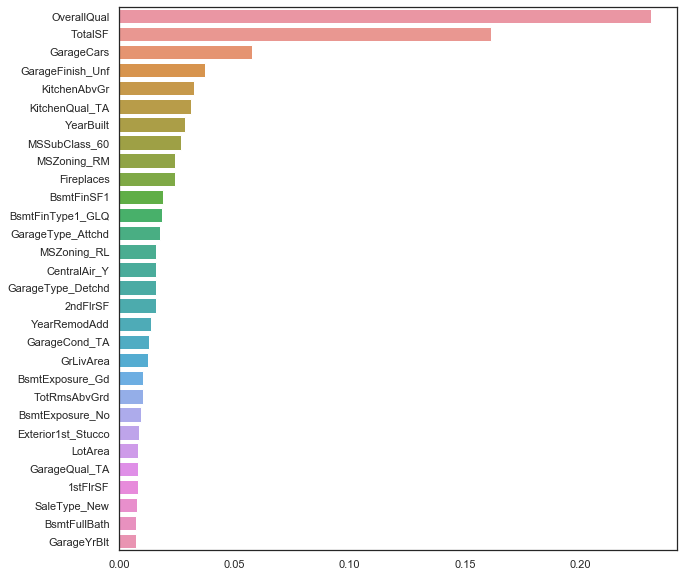

In [51]:
#Visualizing top features
plt.figure(figsize=(10,10))
sb.barplot(y=df_train.columns[imp_feat], x=model.feature_importances_[imp_feat]);

In [52]:
#Select the all the important features from model
reduced_feats = SelectFromModel(model, prefit=True)

In [53]:
#Reduce the original dataset
rdc_train = reduced_feats.transform(df_train)
rdc_test = reduced_feats.transform(df_test)

#Review new dataset sizes
rdc_train.shape, rdc_test.shape

((1460, 75), (1459, 75))

In [54]:
#Saving original y_train
y_train_orig = y_train

In [55]:
#Create new training set and test set from reduced dataset
X_train, X_test, y_train, y_test = train_test_split(rdc_train, y_train, test_size=0.3, random_state=42)

In [56]:
#Review test and training set
print('Training Set: ', X_train.shape)
print('Test Set:', X_test.shape)

Training Set:  (1022, 75)
Test Set: (438, 75)


### Building the Stacking Models

In [57]:
models = [KernelRidge(), ElasticNet(), Lasso(), GradientBoostingRegressor(), BayesianRidge(), LassoLarsIC(), 
          RandomForestRegressor(), xgb.XGBClassifier()]

In [59]:
#Define cross validation strategy
shuff = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [60]:
#Create a dataframe to store algorithm performance
cols = ['AlgoName','Train_RMSE','Test_RMSE']
df_algo_perf = pd.DataFrame(columns=cols)

In [67]:
for i,algo in enumerate(models):
    
    #Fit the model
    algo.fit(X_train, y_train)
    
    algoname = algo.__class__.__name__
    train_rmse = np.sqrt((-cross_val_score(algo, X_train, y_train, cv=shuff, scoring='neg_mean_squared_error')).mean())
    train_rmse = round(train_rmse,4)
    test_rmse = np.sqrt(mean_squared_error(y_test, algo.predict(X_test)))
    test_rmse = round(test_rmse,4)
    
    #update the dataframe
    df_algo_perf.loc[i,'AlgoName'] = algoname
    df_algo_perf.loc[i,'Train_RMSE'] = train_rmse
    df_algo_perf.loc[i,'Test_RMSE'] = test_rmse
    
    print('Algorith - ',algoname,' trained.')

Algorith -  KernelRidge  trained.
Algorith -  ElasticNet  trained.
Algorith -  Lasso  trained.
Algorith -  GradientBoostingRegressor  trained.
Algorith -  BayesianRidge  trained.
Algorith -  LassoLarsIC  trained.
Algorith -  RandomForestRegressor  trained.
Algorith -  XGBClassifier  trained.


In [68]:
df_algo_perf

,AlgoName,Train_RMSE,Test_RMSE
0,KernelRidge,38892.5,31432.9
1,ElasticNet,42848.2,34181.8
2,Lasso,38891.8,31380.9
3,GradientBoostingRegressor,28491.1,24581.1
4,BayesianRidge,47721.6,38268
5,LassoLarsIC,38644.4,32676.3
6,RandomForestRegressor,32334.2,28334.3
7,XGBClassifier,46899.7,51740.8


In [69]:
#Customizing algorithm parameter for each algorithm

KR_param_grid = {'alpha': [0.1], 'coef0': [100], 'degree': [1], 'gamma': [None], 'kernel': ['polynomial']}
EN_param_grid = {'alpha': [0.001], 'copy_X': [True], 'l1_ratio': [0.6], 'fit_intercept': [True], 'normalize': [False],
                 'precompute': [False], 'max_iter': [300], 'tol': [0.001], 'selection': ['random'], 'random_state': [None]}
LASS_param_grid = {'alpha': [0.0005], 'copy_X': [True], 'fit_intercept': [True], 'normalize': [False], 'precompute': [False], 
                    'max_iter': [300], 'tol': [0.01], 'selection': ['random'], 'random_state': [None]}
GB_param_grid = {'loss': ['huber'], 'learning_rate': [0.1], 'n_estimators': [300], 'max_depth': [3], 
                                        'min_samples_split': [0.0025], 'min_samples_leaf': [5]}
BR_param_grid = {'n_iter': [200], 'tol': [0.00001], 'alpha_1': [0.00000001], 'alpha_2': [0.000005], 'lambda_1': [0.000005], 
                 'lambda_2': [0.00000001], 'copy_X': [True]}
LL_param_grid = {'criterion': ['aic'], 'normalize': [True], 'max_iter': [100], 'copy_X': [True], 'precompute': ['auto'],
                 'eps': [0.000001]}
RFR_param_grid = {'n_estimators': [50], 'max_features': ['auto'], 'max_depth': [None], 'min_samples_split': [5],
                  'min_samples_leaf': [2]}
XGB_param_grid = {'max_depth': [3], 'learning_rate': [0.1], 'n_estimators': [300], 'booster': ['gbtree'], 'gamma': [0],
                  'reg_alpha': [0.1], 'reg_lambda': [0.7], 'max_delta_step': [0], 'min_child_weight': [1],
                  'colsample_bytree': [0.5], 'colsample_bylevel': [0.2], 'scale_pos_weight': [1]}
params_grid = [KR_param_grid, EN_param_grid, LASS_param_grid, GB_param_grid, BR_param_grid, LL_param_grid, RFR_param_grid, 
               XGB_param_grid]

In [70]:
df_cust_algo_perf = pd.DataFrame(cols)

In [71]:
for i,algo in enumerate(models):
    
    #Define model
    model = GridSearchCV(algo, param_grid = params_grid[0], cv = shuff, scoring = 'neg_mean_squared_error', n_jobs=-1)
    params_grid.pop(0)
    
    #Fit the model
    model.fit(X_train, y_train)
    
    algoname = algo.__class__.__name__
    train_rmse = np.sqrt((-cross_val_score(model, X_train, y_train, cv=shuff, scoring='neg_mean_squared_error')).mean())
    train_rmse = round(train_rmse,4)
    test_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    test_rmse = round(test_rmse,4)
    
    #update the dataframe
    df_cust_algo_perf.loc[i,'AlgoName'] = algoname
    df_cust_algo_perf.loc[i,'Train_RMSE'] = train_rmse
    df_cust_algo_perf.loc[i,'Test_RMSE'] = test_rmse
    
    print('Algorith -',algoname,'trained.')
    

Algorith - KernelRidge trained.
Algorith - ElasticNet trained.
Algorith - Lasso trained.
Algorith - GradientBoostingRegressor trained.
Algorith - BayesianRidge trained.
Algorith - LassoLarsIC trained.
Algorith - RandomForestRegressor trained.


OSError: exception: access violation reading 0x000001BA73911B80

In [72]:
df_cust_algo_perf

,0,AlgoName,Train_RMSE,Test_RMSE
0,AlgoName,KernelRidge,38968.0097,31278.6471
1,Train_RMSE,ElasticNet,38847.2995,31372.8501
2,Test_RMSE,Lasso,38895.0584,31386.4791
3,NaN,GradientBoostingRegressor,29344.9931,25134.7661
4,NaN,BayesianRidge,47721.6040,38267.9660
5,NaN,LassoLarsIC,38644.4078,32676.2589
6,NaN,RandomForestRegressor,32207.0241,26483.6690
